In [290]:
import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [291]:
df = pd.read_csv("./spotify-2023.csv" , encoding = 'latin-1')

In [292]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [293]:
df = df.drop(574)

In [294]:
df['streams'] = df['streams'].astype('int64')

In [295]:
#Removing all null values with averages
df["in_shazam_charts"].fillna('0', inplace=True)
df["key"].fillna("C#", inplace=True)

In [296]:
#Conversion to strings and numerics
convert_to_string = {'track_name', 'artist(s)_name', 'key', 'mode'}
convert_to_numeric = {"in_deezer_playlists", "in_shazam_charts"}

for col_name in convert_to_string:
    print(col_name)
    df[col_name] = df[col_name].astype("string")

for col_name in convert_to_numeric:
    print(col_name)
    df[col_name] = df[col_name].str.replace(',', '').astype(np.int64)

artist(s)_name
track_name
key
mode
in_shazam_charts
in_deezer_playlists


In [297]:
df['mode'].replace(['Major', 'Minor'],['0', '1'], inplace=True)
df['mode'] = df['mode'].astype('int64')


In [298]:
columns = ['streams','released_year','bpm','mode','danceability_%', 'valence_%', 'energy_%','acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
columns2 = ['streams', 'in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists', 'in_spotify_charts', 'in_apple_charts', 'in_deezer_charts']
columns3 = ['streams', 'in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists', 'in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'released_year','bpm','mode','danceability_%', 'valence_%', 'energy_%','acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

In [299]:
df_copy = df[columns].copy()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   streams             952 non-null    int64
 1   released_year       952 non-null    int64
 2   bpm                 952 non-null    int64
 3   mode                952 non-null    int64
 4   danceability_%      952 non-null    int64
 5   valence_%           952 non-null    int64
 6   energy_%            952 non-null    int64
 7   acousticness_%      952 non-null    int64
 8   instrumentalness_%  952 non-null    int64
 9   liveness_%          952 non-null    int64
 10  speechiness_%       952 non-null    int64
dtypes: int64(11)
memory usage: 89.2 KB


In [300]:
def custom_standard_scaler(data):
    mean = data.mean(axis=0)
    std = data.std(axis=0)
    standardized_data = (data - mean) / std
    return standardized_data

In [301]:
# Normalise
df_copy[columns] = custom_standard_scaler(df_copy[columns])

In [302]:
X = df_copy.drop(columns='streams')
y = df_copy.streams

In [303]:
def custom_train_test_split(X, y):
    n_samples = X.shape[0]
    n_train_samples = int(n_samples * 0.7)
    
    X_train, X_test = X[:n_train_samples], X[n_train_samples:]
    y_train, y_test = y[:n_train_samples], y[n_train_samples:]
    
    return X_train, X_test, y_train, y_test

In [304]:
class CustomLinearRegression:
    def __init__(self):
        self.coefficients = None
        
    def fit(self, X, y, learning_rate=0.01, num_iterations=1000):
        # Add bias term to X
        X = np.c_[np.ones(X.shape[0]), X]
        
        # Initialize coefficients
        self.coefficients = np.zeros(X.shape[1])
        
        # Perform gradient descent
        for i in range(num_iterations):
            # Compute predictions
            y_pred = np.dot(X, self.coefficients)
            
            # Compute gradients
            gradients = -(2 / len(X)) * np.dot(X.T, (y - y_pred))
            
            # Update coefficients
            self.coefficients -= learning_rate * gradients
    
    def predict(self, X):
        # Add bias term to X
        X = np.c_[np.ones(X.shape[0]), X]
        
        # Make predictions
        return X.dot(self.coefficients)

In [305]:
X_train, X_test, y_train, y_test = custom_train_test_split(X, y)

In [306]:
model = CustomLinearRegression()

In [307]:
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [308]:
# model evaluation
print('Mean squared error : ', np.mean((y_test - predictions) ** 2))

Mean squared error :  0.6692975009824067


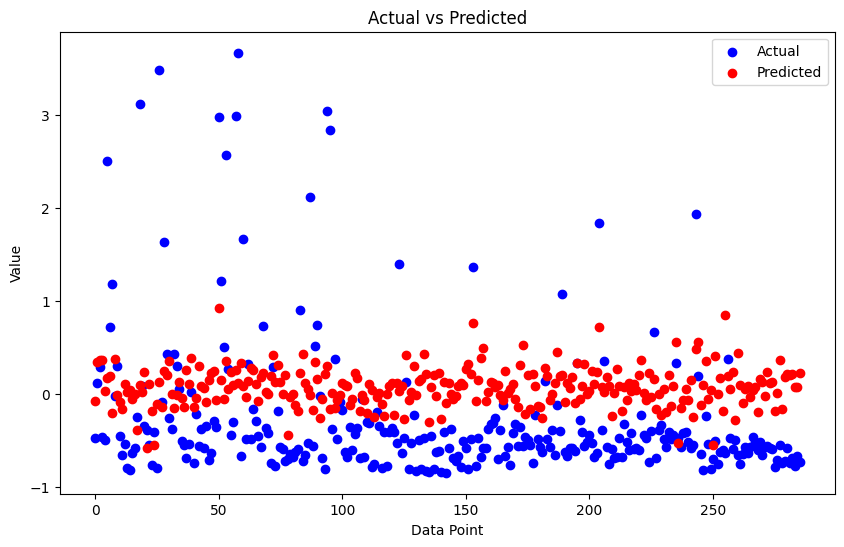

In [309]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(predictions)), predictions, color='red', label='Predicted')
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()